<a href="https://colab.research.google.com/github/skmisht/CNN/blob/main/TensorFlow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
training_truth_data = pd.read_csv('/content/drive/MyDrive/Datasets/CSV/ISIC-2017_Training_Part3_GroundTruth.csv') 
testing_truth_data = pd.read_csv('/content/drive/MyDrive/Datasets/CSV/ISIC-2017_Test_v2_Part3_GroundTruth.csv') 
validation_truth_data = pd.read_csv('/content/drive/MyDrive/Datasets/CSV/ISIC-2017_Validation_Part3_GroundTruth.csv')

training_metadata = pd.read_csv('/content/drive/MyDrive/Datasets/Image_folder/ISIC-2017_Training_Data/ISIC-2017_Training_Data_metadata.csv')
testing_metadata = pd.read_csv('/content/drive/MyDrive/Datasets/Image_folder/ISIC-2017_Test_v2_Data/ISIC-2017_Test_v2_Data_metadata.csv')
validation_metadata = pd.read_csv('/content/drive/MyDrive/Datasets/Image_folder/ISIC-2017_Validation_Data/ISIC-2017_Validation_Data_metadata.csv')

path_training_images ='/content/drive/MyDrive/Datasets/Image_folder/ISIC-2017_Training_Data'
path_testing_images ='/content/drive/MyDrive/Datasets/Image_folder/ISIC-2017_Test_v2_Data'
path_validation_images = '/content/drive/MyDrive/Datasets/Image_folder/ISIC-2017_Validation_Data'

#add new column to truth_data with the path to corresponding image
def prepare_data(truth_data, metadata, image_path):
  path_to_images_array = []
  for x in truth_data.values:
    path_to_image = image_path+str(x[0])+'.jpg'
    path_to_images_array.append(str(path_to_image))
  #add path to image to the truth data frame
  truth_data['path_to_image'] = path_to_images_array
  #return merge truth data with metadata, join on the image_id's
  return pd.merge(truth_data, metadata, left_on='image_id', right_on='image_id', how='left')


training_data = prepare_data(training_truth_data, training_metadata, path_training_images)
testing_data = prepare_data(testing_truth_data, testing_metadata, path_testing_images)
validation_data = prepare_data(validation_truth_data, validation_metadata, path_validation_images)

pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.max_colwidth', None)
#print(training_data.head())
path_training_images


'/content/drive/MyDrive/Datasets/Image_folder/ISIC-2017_Training_Data'

**Display images from training data**

FileNotFoundError: ignored

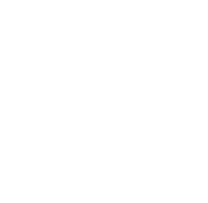

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows, ncols = 4, 4
pic_index=0

# Display a batch of 8 training and 8 test images, also we can rerun the cell to see a fresh batch at each time
# set up matplotlib fig, and size to fit our 4*4 images
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# increment the pic_index upto 8
pic_index += 8

# listing images from training and and test data
training_list_of_images = training_data['path_to_image'].to_list()
test_list_of_images = testing_data['path_to_image'].to_list()

# iterate over the training and test images
train_melanoma_image = [name for name in training_list_of_images[pic_index-8:pic_index]]
test_melanoma_image = [name for name in test_list_of_images[pic_index-8:pic_index]]

# enumerting over the train and test images
for i, image_path in enumerate(train_melanoma_image + test_melanoma_image):
  # set up the subplot - subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  # do not display axis or gridline
  sp.axis('off')
  img = mpimg.imread(image_path)
  plt.imshow(img)

# display images
plt.show()

 